### Introduction and Objectives

This notebook presents an exploratory data analysis (EDA) of daily meteorological
observations for two winter seasons in Almaty.

The primary objective is to understand the statistical properties, temporal dynamics,
and inter-variable relationships within the data. Particular attention is paid to
differences and similarities between the two winters.

The results of this analysis will serve as the empirical basis for subsequent
feature engineering and time series modeling, where the target variable is the
average daily temperature (`tavg`).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Global academic plotting style
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "font.size": 11,

    "axes.titlesize": 14,
    "axes.titleweight": "bold",
    "axes.labelsize": 12,
    "axes.labelweight": "bold",

    "xtick.labelsize": 10,
    "ytick.labelsize": 10,

    "legend.fontsize": 10,
    "legend.title_fontsize": 11,

    "figure.titlesize": 16,
    "figure.titleweight": "bold",

    "axes.spines.top": False,
    "axes.spines.right": False,
})

sns.set_style("whitegrid")
sns.set_palette(["#1f4e79", "#7a1f1f"])


### Dataset Description

The dataset consists of daily weather observations with the following variables:

- `date` — observation date
- `tavg` — average daily temperature
- `tmin`, `tmax` — minimum and maximum daily temperature
- `prcp` — total daily precipitation
- `snow` — snow depth
- `wdir` — wind direction (degrees)
- `wspd` — wind speed
- `wpgt` — wind gust speed
- `pres` — air pressure
- `tsun` — sunshine duration

Two winter seasons are considered:
- Winter 2024–2025
- Winter 2025–2026

In [3]:
df_2425 = pd.read_csv(
    "../data/raw/temp_almaty_wint_24_25.csv",
    parse_dates=["date"]
)
df_2526 = pd.read_csv(
    "../data/raw/temp_almaty_wint_25_26.csv",
    parse_dates=["date"]
)

df_2425["season"] = "2024–2025"
df_2526["season"] = "2025–2026"

df = pd.concat([df_2425, df_2526], ignore_index=True)
df = df.sort_values("date").reset_index(drop=True)

### Data Quality and Integrity Checks

Before conducting any statistical analysis, data quality is assessed with respect to:
- completeness of observations
- continuity of the time index
- basic plausibility of numerical values

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    142 non-null    datetime64[us]
 1   tavg    139 non-null    float64       
 2   tmin    139 non-null    float64       
 3   tmax    139 non-null    float64       
 4   prcp    135 non-null    float64       
 5   snow    82 non-null     float64       
 6   wdir    0 non-null      float64       
 7   wspd    139 non-null    float64       
 8   wpgt    0 non-null      float64       
 9   pres    139 non-null    float64       
 10  tsun    0 non-null      float64       
 11  season  142 non-null    str           
dtypes: datetime64[us](1), float64(10), str(1)
memory usage: 13.4 KB


In [5]:
df.head()

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,season
0,2024-12-01,2.5,0.0,4.0,12.4,NaN,NaN,7.4,NaN,1024.6,NaN,2024–2025
1,2024-12-02,2.6,0.7,4.5,1.2,NaN,NaN,6.2,NaN,1027.8,NaN,2024–2025
2,2024-12-03,2.9,1.0,6.2,0.0,NaN,NaN,6.2,NaN,1029.7,NaN,2024–2025
3,2024-12-04,-0.1,-1.0,3.5,0.0,NaN,NaN,6.3,NaN,1029.8,NaN,2024–2025
4,2024-12-05,-0.7,-4.2,3.6,0.0,NaN,NaN,5.0,NaN,1024.9,NaN,2024–2025


In [6]:
df.isna().mean().sort_values(ascending=False)

wpgt      1.000000
tsun      1.000000
wdir      1.000000
snow      0.422535
prcp      0.049296
tmax      0.021127
tmin      0.021127
tavg      0.021127
pres      0.021127
wspd      0.021127
date      0.000000
season    0.000000
dtype: float64

In [7]:
for season, dfg in df.groupby("season"):
    diffs = dfg["date"].sort_values().diff().dt.days
    print(f"\n{season}")
    print(diffs.value_counts().head())



2024–2025
date
1.0    70
Name: count, dtype: int64

2025–2026
date
1.0    70
Name: count, dtype: int64


### Descriptive Statistics by Winter Season

Summary statistics are computed separately for each winter season in order to
highlight differences in temperature level and variability.

In [8]:
(
    df.groupby("season")[["tavg", "tmin", "tmax"]]
    .describe()
    .round(2)
)

tavg                                         tmin        ...        \
          count  mean   std   min   25%  50%  75%  max count  mean  ...   75%   
season                                                              ...         
2024–2025  71.0 -3.10  3.87 -14.0 -6.20 -2.3 -0.3  4.1  71.0 -7.32  ... -4.15   
2025–2026  68.0 -0.74  4.68 -16.6 -2.33  0.2  2.1  6.5  68.0 -3.41  ... -0.60   

                tmax                                            
           max count  mean   std   min   25%   50%   75%   max  
season                                                          
2024–2025  1.0  71.0  1.92  3.94 -10.5 -0.50  2.10  4.10  10.7  
2025–2026  3.5  68.0  2.49  5.40 -15.8 -0.77  3.05  6.02  10.9  

[2 rows x 24 columns]

### Temperature Dynamics

This section examines the temporal evolution and distributional properties of
average daily temperature across both winter seasons.

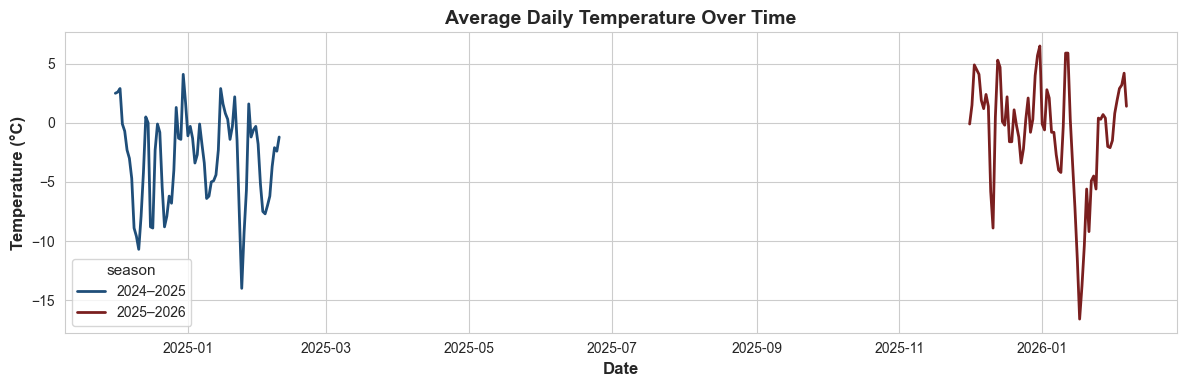

In [9]:
plt.figure(figsize=(12, 4))
sns.lineplot(
    data=df,
    x="date",
    y="tavg",
    hue="season",
    linewidth=2
)
plt.title("Average Daily Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.tight_layout()
plt.show()

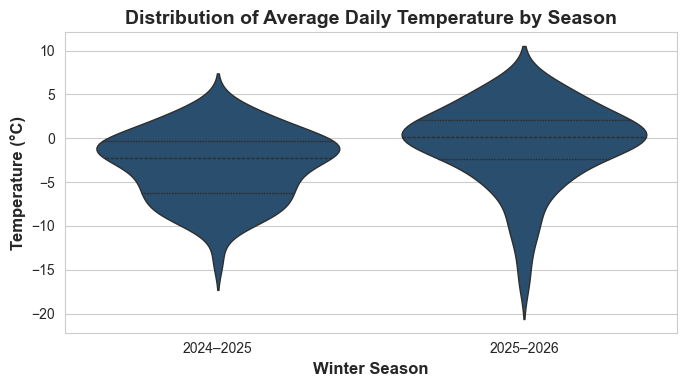

In [10]:
plt.figure(figsize=(7, 4))
sns.violinplot(
    data=df,
    x="season",
    y="tavg",
    inner="quartile",
    linewidth=1
)
plt.title("Distribution of Average Daily Temperature by Season")
plt.xlabel("Winter Season")
plt.ylabel("Temperature (°C)")
plt.tight_layout()
plt.show()

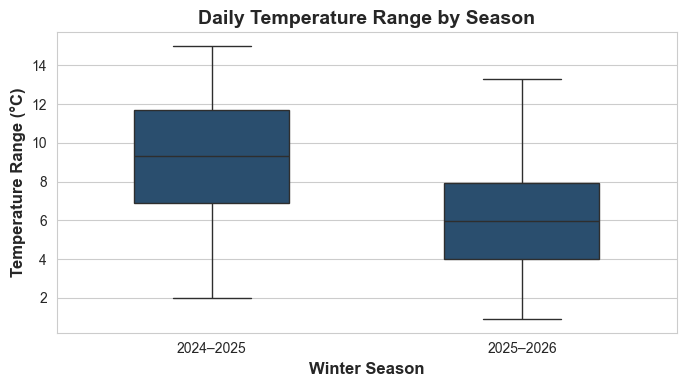

In [11]:
df["temp_range"] = df["tmax"] - df["tmin"]

plt.figure(figsize=(7, 4))
sns.boxplot(
    data=df,
    x="season",
    y="temp_range",
    width=0.5
)
plt.title("Daily Temperature Range by Season")
plt.xlabel("Winter Season")
plt.ylabel("Temperature Range (°C)")
plt.tight_layout()
plt.show()

### Precipitation and Snow

Precipitation and snow depth are analysed to assess winter severity and their
relationship with temperature.


In [12]:
(df["prcp"] > 0).groupby(df["season"]).mean()

season
2024–2025    0.281690
2025–2026    0.253521
Name: prcp, dtype: float64

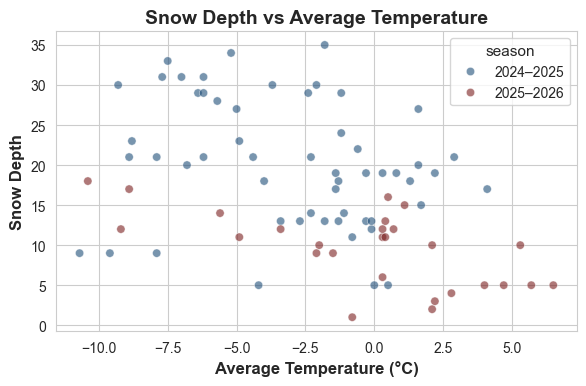

In [13]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df,
    x="tavg",
    y="snow",
    hue="season",
    alpha=0.6
)
plt.title("Snow Depth vs Average Temperature")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Snow Depth")
plt.tight_layout()
plt.show()

### Wind and Pressure Characteristics

Wind speed, wind gusts, and atmospheric pressure are examined to evaluate their
stability and potential relevance as explanatory variables.

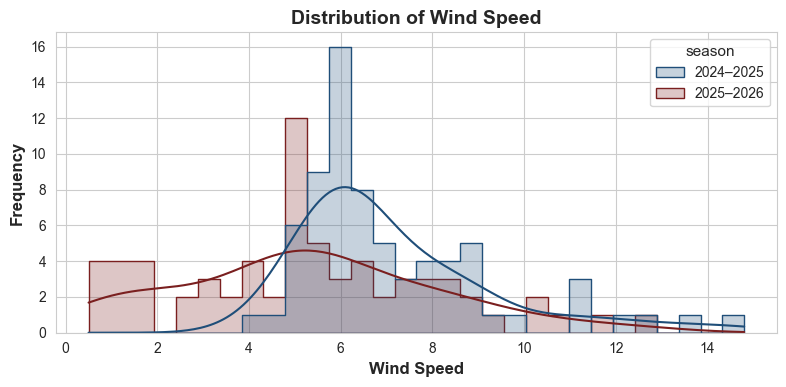

In [14]:
plt.figure(figsize=(8, 4))
sns.histplot(
    data=df,
    x="wspd",
    hue="season",
    bins=30,
    kde=True,
    element="step"
)
plt.title("Distribution of Wind Speed")
plt.xlabel("Wind Speed")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### Correlation Analysis

Pearson correlation coefficients are computed to identify linear relationships
between average temperature and other meteorological variables.

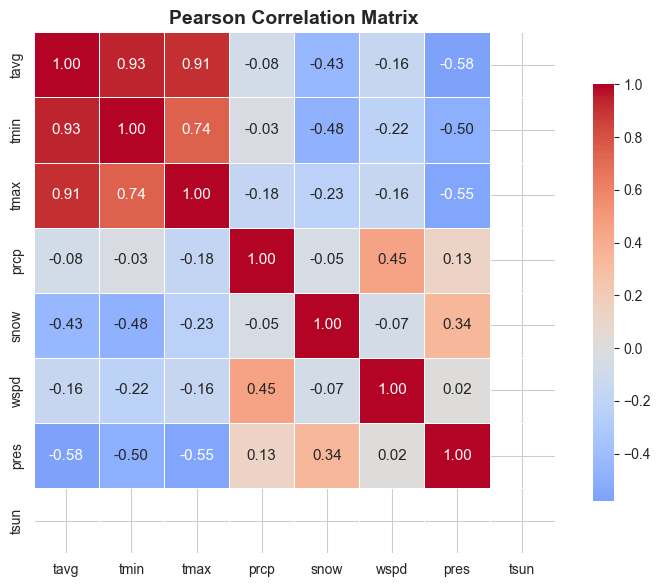

In [15]:
corr_cols = ["tavg", "tmin", "tmax", "prcp", "snow", "wspd", "pres", "tsun"]
corr = df[corr_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Pearson Correlation Matrix")
plt.tight_layout()
plt.show()

### Key Insights for Modeling

- Average temperature is strongly associated with minimum and maximum daily temperature.
- Snow depth exhibits a clear negative relationship with temperature.
- Sunshine duration shows a positive association with temperature.
- Wind-related variables and pressure are comparatively stable but may provide
  complementary explanatory power.
- The presence of temporal structure motivates the use of lagged and rolling features.

These findings directly inform the feature engineering strategy developed in
subsequent notebooks.